In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf

In [2]:
dataset = pd.read_csv("customer_shopping_data.csv")
dataset

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
dataset = pd.read_csv("customer_shopping_data.csv", index_col=3)
dataset

,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall
age,,,,,,,,,
28,I138884,C241288,Female,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
21,I317333,C111565,Male,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
20,I127801,C266599,Male,Clothing,1,300.08,Cash,9/11/2021,Metrocity
66,I173702,C988172,Female,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
53,I337046,C189076,Female,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...
45,I219422,C441542,Female,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
27,I325143,C569580,Male,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
63,I824010,C103292,Male,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


In [5]:
dataset.loc[28, ("quantity","invoice_date")]

,quantity,invoice_date
age,,
28,5,5/8/2022
28,5,24/05/2022
28,3,26/10/2021
28,4,26/03/2022
28,3,3/4/2021
...,...,...
28,5,5/4/2021
28,4,16/12/2022
28,4,25/07/2021


In [6]:
dataset2 = dataset.loc[28, ("quantity","invoice_date")]
dataset2

,quantity,invoice_date
age,,
28,5,5/8/2022
28,5,24/05/2022
28,3,26/10/2021
28,4,26/03/2022
28,3,3/4/2021
...,...,...
28,5,5/4/2021
28,4,16/12/2022
28,4,25/07/2021


In [7]:
dataset2["invoice_date"] = pd.to_datetime(dataset2["invoice_date"])
dataset2.sort_values(by="invoice_date", inplace=True)
dataset2

C:\Users\User\AppData\Local\Temp\ipykernel_5080\2439095110.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,quantity,invoice_date
age,,
28,5,2021-01-01
28,2,2021-01-01
28,5,2021-01-03
28,1,2021-01-03
28,1,2021-01-04
...,...,...
28,4,2023-11-01
28,1,2023-11-02
28,5,2023-12-01


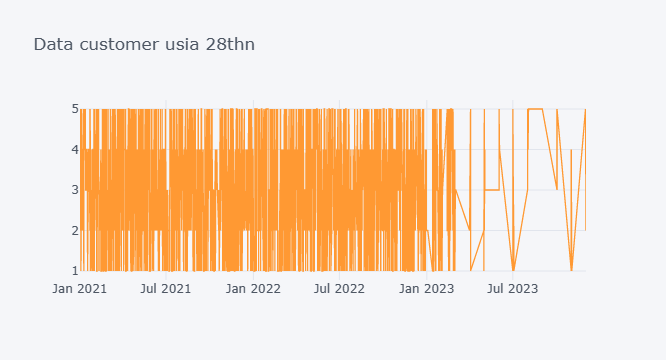

In [10]:
cf.go_offline()
dataset2.loc[28, ("quantity", "invoice_date")].iplot(x="invoice_date", y="quantity",
                                                    title="Data customer usia 28thn")